### Comenzamos con la importacion de las librerias necesarias para este proyecto

In [385]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A continuacion vamos a leer el archivo .xlsx que va a estar acotado, es decir, se removieron hojas de este libro dado que no eran relevantes para el analisis. Ademas habia otras hojas que contenian la misma informacion.

In [316]:
df_internet = pd.ExcelFile('Data/Internet_acotado.xlsx')
sheet = df_internet.sheet_names

### Las siguientes hojas son las que vamos a utilizar para el analisis

In [317]:
sheet

['Velocidad % por prov',
 'Accesos Por Tecnología',
 'Penetracion-totales',
 'Penetración-poblacion',
 'Penetracion-hogares',
 'Accesos por velocidad',
 'Ingresos ']

----------

### Analizando los datos de las hojas (sheet)

* Valores nulos
* Valores ceros
* Valores duplicados
* Outliers

### Comenzamos con la hoja Ingresos

Contiene los Ingresos generados por los servicios de internet en miles de
pesos.

In [318]:
# Cargamos la hoja del archivo en un Data Frame
df_ingresos = df_internet.parse('Ingresos ')
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2024,1,2.804191e+08,Ene-Mar 2024
1,2023,4,1.673760e+08,Oct-Dic 2023
2,2023,3,1.331066e+08,Jul-Sept 2023
3,2023,2,1.180603e+08,Jun-Mar 2023
4,2023,1,1.041350e+08,Ene-Mar 2023


In [386]:
# Viendo valores nulos
df_ingresos.isna().sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [387]:
# Viendo valores ceros
(df_ingresos == 0).sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [388]:
# Viendo valores duplicados
df_ingresos.duplicated().sum()


np.int64(0)

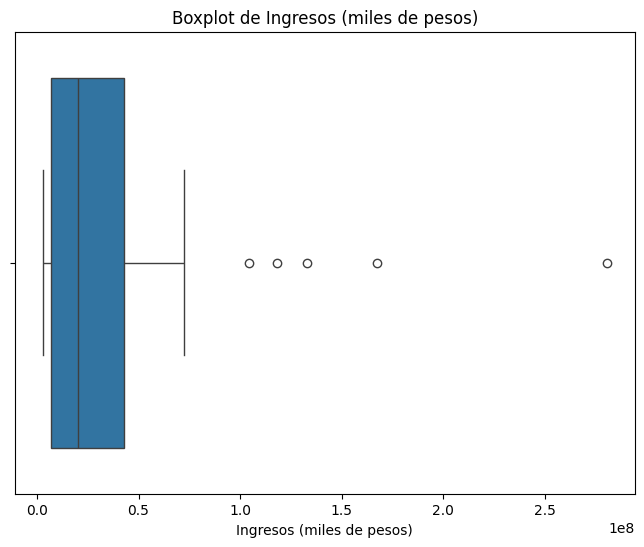

In [322]:
# Boxplot 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_ingresos['Ingresos (miles de pesos)'])
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.show()

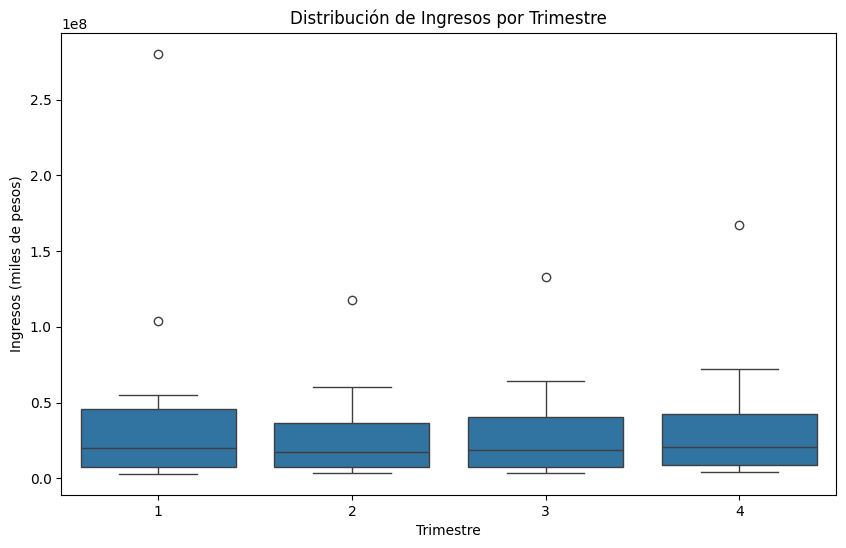

In [323]:
# Grafica separada por trimestre
plt.figure(figsize=(10, 6))
sns.boxplot(x='Trimestre', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Distribución de Ingresos por Trimestre')
plt.show()

#### El crecimiento de los ingresos fue muy rapido los ultimos años, es por eso que se puede ver sesgado mas a la derecha, lo que explica los valores atipicos fuera de los bigotes del grafico Boxplot

----

## Analisis de la hoja de accesos por velocidad

In [389]:
# Guardamos la hoja en un Data Frame
df_accesos_por_velocidad = df_internet.parse('Accesos por velocidad')
df_accesos_por_velocidad.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2024,1,Buenos Aires,26002.0,22510.0,221185.0,233225.0,241778.0,106418.0,4068292.0,125147.0,5044557.0
1,2024,1,Capital Federal,516.0,5418.0,29753.0,51415.0,37369.0,5957.0,1374283.0,0.0,1504711.0
2,2024,1,Catamarca,71.0,176.0,2872.0,3424.0,4204.0,1822.0,62294.0,70.0,74933.0
3,2024,1,Chaco,236.0,416.0,14156.0,9044.0,5533.0,5718.0,116624.0,3816.0,155543.0
4,2024,1,Chubut,111.0,1083.0,43828.0,31885.0,23024.0,20261.0,33844.0,16640.0,170676.0


In [390]:
# Viendo valores nulos
df_accesos_por_velocidad.isna().sum()

Año                    0
Trimestre              0
Provincia              0
HASTA 512 kbps         0
+ 512 Kbps - 1 Mbps    0
+ 1 Mbps - 6 Mbps      0
+ 6 Mbps - 10 Mbps     0
+ 10 Mbps - 20 Mbps    0
+ 20 Mbps - 30 Mbps    0
+ 30 Mbps              0
OTROS                  6
Total                  0
dtype: int64

In [391]:
# Viendo valores ceros
(df_ingresos == 0).sum()

Año                          0
Trimestre                    0
Ingresos (miles de pesos)    0
Periodo                      0
dtype: int64

In [392]:
# Viendo valores duplicados
df_ingresos.duplicated().sum()

np.int64(0)

In [328]:
df_accesos_por_velocidad.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

### Outliers vamos a buscar a partir de los 6 Megas de velocidad

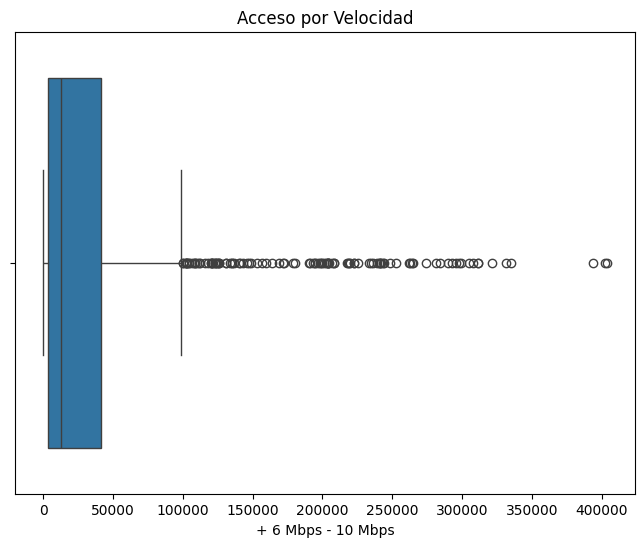

In [329]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 6 Mbps - 10 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

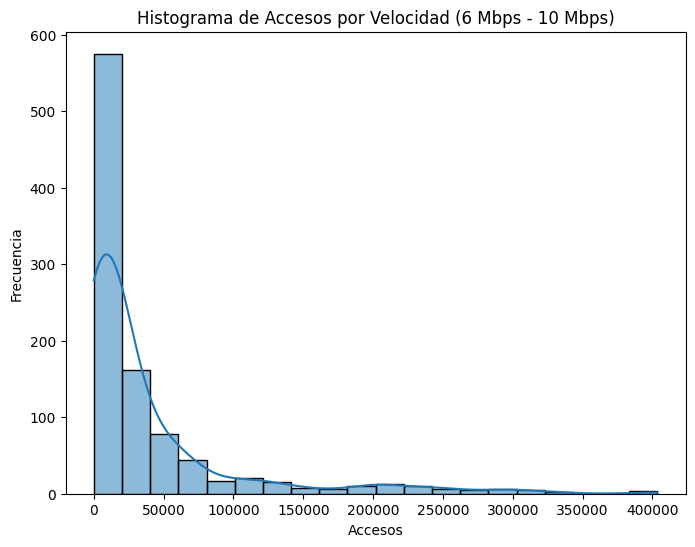

In [393]:
# Histograma de la columna '+ 6 Mbps - 10 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 6 Mbps - 10 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (6 Mbps - 10 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()


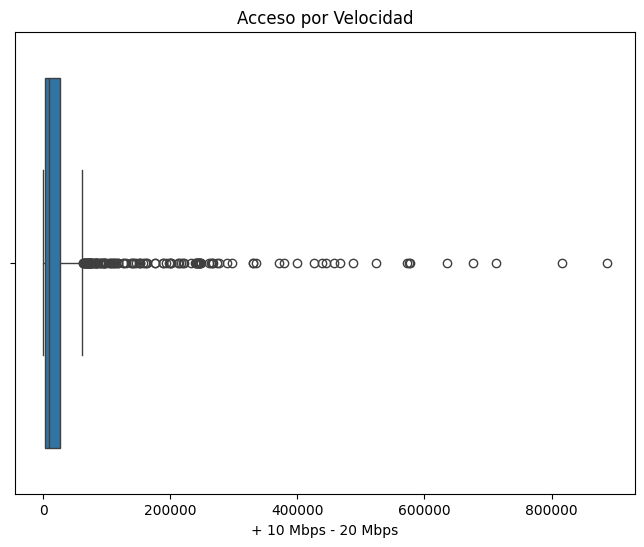

In [330]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 10 Mbps - 20 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

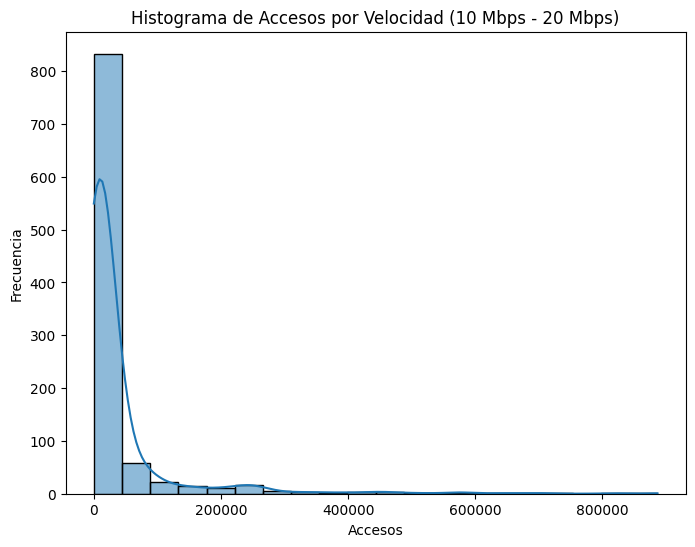

In [394]:
# Histograma de la columna '+ 10 Mbps - 20 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 10 Mbps - 20 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (10 Mbps - 20 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()


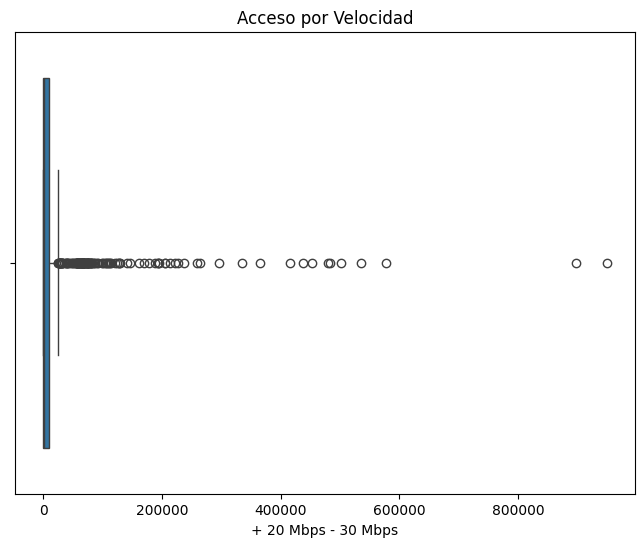

In [331]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 20 Mbps - 30 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()

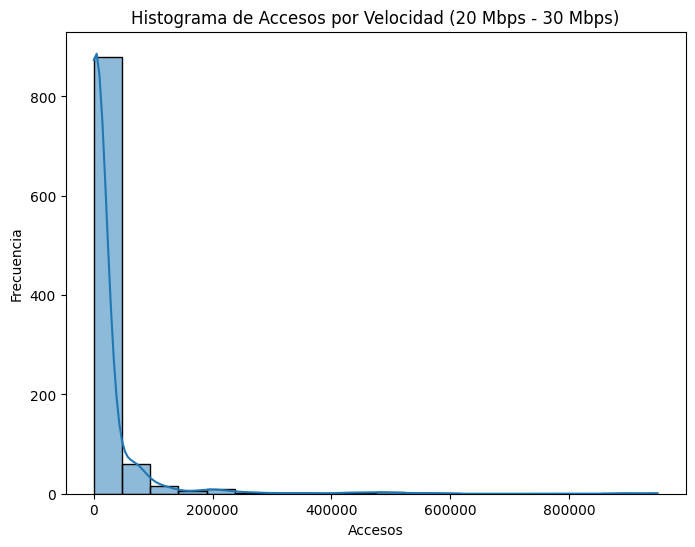

In [395]:
# Histograma de la columna '+ 20 Mbps - 30 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 20 Mbps - 30 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (20 Mbps - 30 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()


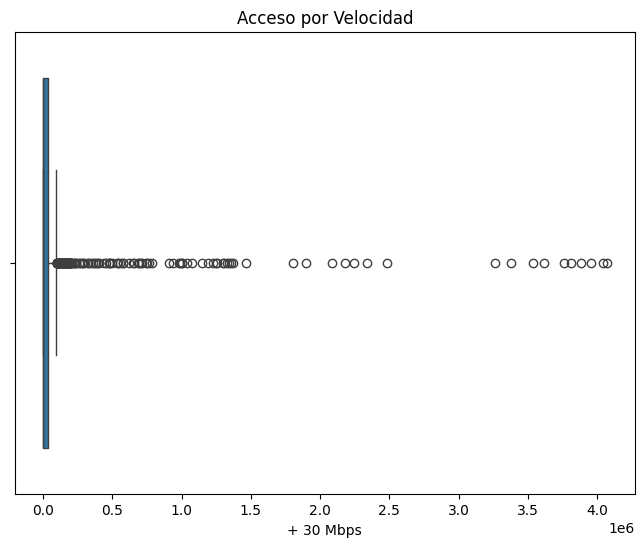

In [332]:
# Boxplot de la columna 'Ingresos (miles de pesos)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_accesos_por_velocidad['+ 30 Mbps'])
plt.title('Acceso por Velocidad')
plt.show()


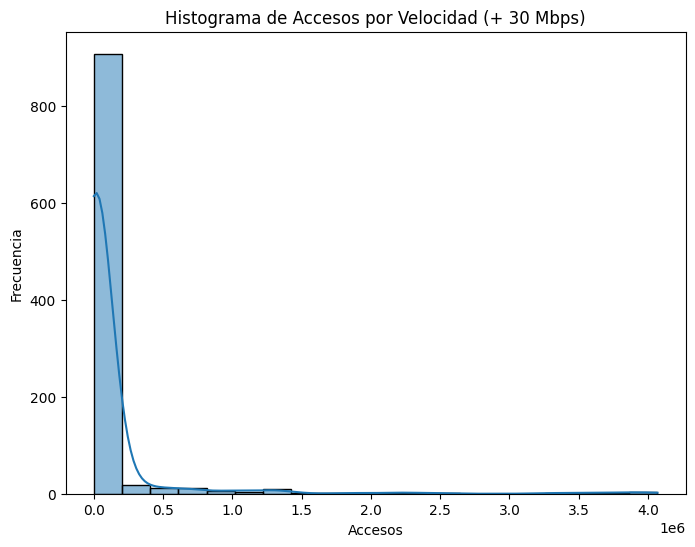

In [396]:
# Histograma de la columna '+ 30 Mbps'
plt.figure(figsize=(8, 6))
sns.histplot(df_accesos_por_velocidad['+ 30 Mbps'], bins=20, kde=True)
plt.title('Histograma de Accesos por Velocidad (+ 30 Mbps)')
plt.xlabel('Accesos')
plt.ylabel('Frecuencia')
plt.show()

#### Acompañamos cada Boxplot con un histograma. Tenemos muchos valores atipicos, pero esto se debe a la distribucion asimetrica que existe con cada velocidad de conexion. Tambien por crecimientos irregulares que varian en cada provincia a traves del tiempo.

---

### Analisis de la hoja Penetracion-hogares

In [398]:
# Pasamos la hoja a un Data Frame
df_penetracion_hogares = df_internet.parse('Penetracion-hogares')
df_penetracion_hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [399]:
# Valores nulos
df_penetracion_hogares.isna().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [400]:
# Ceros 
(df_penetracion_hogares == 0).sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [401]:
# Valores duplicados
df_penetracion_hogares.duplicated().sum()

np.int64(0)

In [402]:
df_penetracion_hogares.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

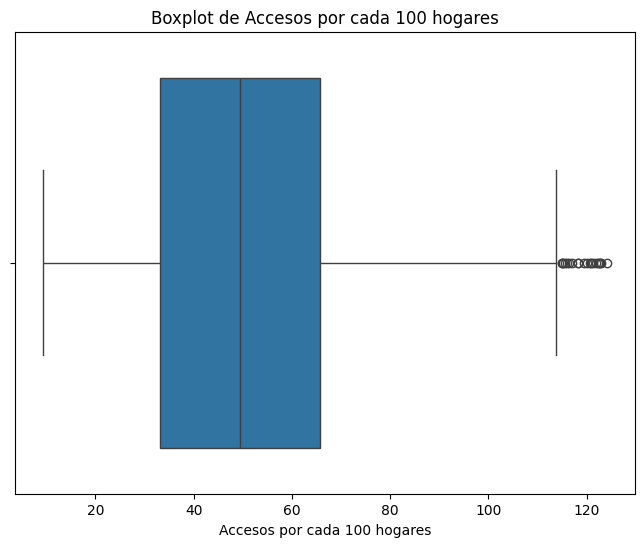

In [403]:
# Boxplot de la columna 'Accesos por cada 100 hogares'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_penetracion_hogares['Accesos por cada 100 hogares'])
plt.title('Boxplot de Accesos por cada 100 hogares')
plt.show()

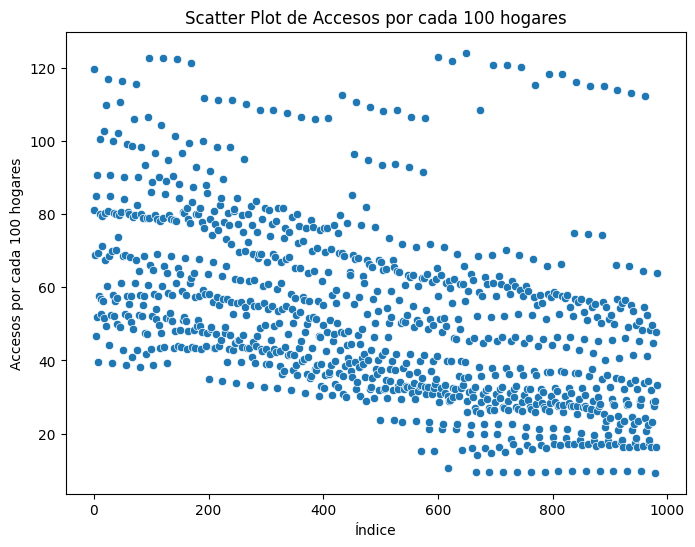

In [404]:
# Scatter Acceso por cada 100 hogares
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_penetracion_hogares.index, y=df_penetracion_hogares['Accesos por cada 100 hogares'])
plt.title('Scatter Plot de Accesos por cada 100 hogares')
plt.xlabel('Índice')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()


#### Acompañamos este ultimo grafico tambien para observar el grado de dispersion de los accesos por cada 100 hogares

---

### Analisis de la hoja Penetración-poblacion

In [405]:
# Guardamos la hoja en un Data Frame
df_penetracion_poblacion = df_internet.parse('Penetración-poblacion')
df_penetracion_poblacion.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2024,1,Buenos Aires,27.80
1,2024,1,Capital Federal,48.78
2,2024,1,Catamarca,17.50
3,2024,1,Chaco,12.48
4,2024,1,Chubut,26.02


In [406]:
# Valores nulos
df_penetracion_poblacion.isna().sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [407]:
# Ceros
(df_penetracion_poblacion == 0).sum()

Año                         0
Trimestre                   0
Provincia                   0
Accesos por cada 100 hab    0
dtype: int64

In [408]:
# Valores duplicados
df_penetracion_poblacion.duplicated().sum()

np.int64(0)

In [409]:
df_penetracion_poblacion.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hab'], dtype='object')

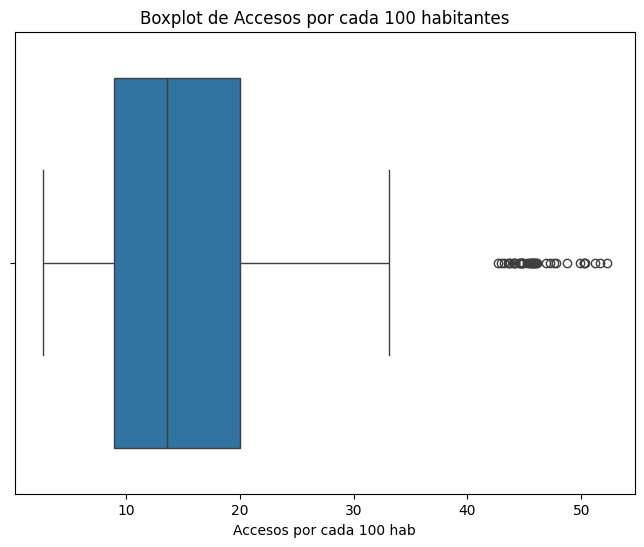

In [410]:
# Boxplot de la columna 'Accesos por cada 100 hab'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_penetracion_poblacion['Accesos por cada 100 hab'])
plt.title('Boxplot de Accesos por cada 100 habitantes')
plt.show()


---

### Analisis de la hoja Penetracion-totales

In [411]:
# Pasamos la hoja a un DataFrame
df_penetracion_totales = df_internet.parse('Penetracion-totales')
df_penetracion_totales

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2024,1,78.890000,24.790000,Ene-Mar 2024
1,2023,4,78.560000,24.660000,Oct-Dic 2023
2,2023,3,77.840000,24.410000,Jul-Sept 2023
3,2023,2,77.020000,24.140000,Abr-Jun 2023
4,2023,1,77.200000,24.170000,Ene-Mar 2023
5,2022,4,77.210000,24.150000,Oct-Dic 2022
6,2022,3,76.640000,23.950000,Jul-Sept 2022
7,2022,2,75.965424,23.720442,Abr-Jun 2022
8,2022,1,73.878803,23.049171,Ene-Mar 2022
9,2021,4,73.176397,22.810702,Oct-Dic 2021


In [412]:
# Viendo valores nulos
df_penetracion_totales.isna().sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [413]:
# Viendo ceros
(df_penetracion_totales == 0).sum()

Año                             0
Trimestre                       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Periodo                         0
dtype: int64

In [414]:
# Viendo duplicados
df_penetracion_totales.duplicated().sum()

np.int64(0)

In [415]:
df_penetracion_totales.columns

Index(['Año', 'Trimestre', 'Accesos por cada 100 hogares',
       'Accesos por cada 100 hab', 'Periodo'],
      dtype='object')

#### Graficos para evaluar algunas relaciones

1. Evolución de la penetración de accesos por cada 100 hogares y cada 100 habitantes a lo largo de los años.

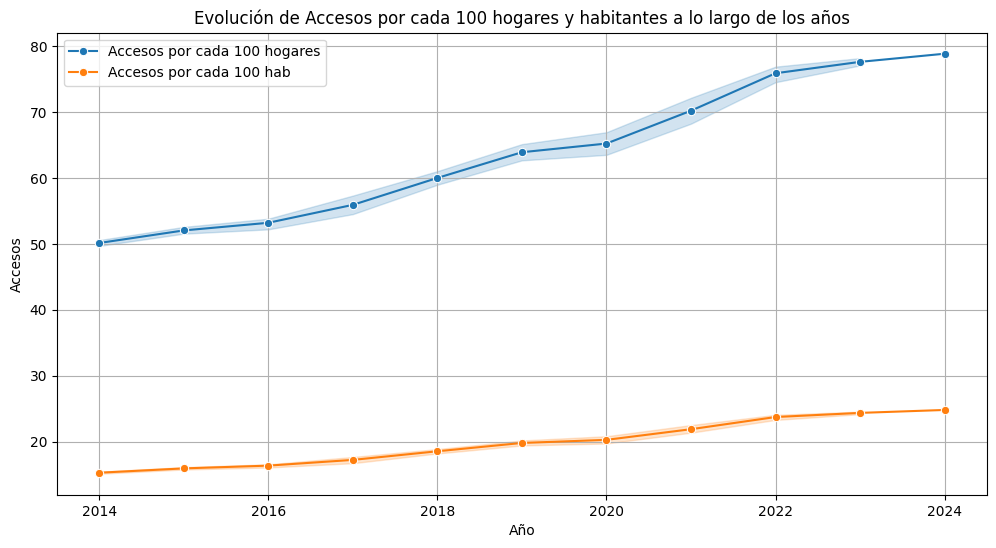

In [416]:
# Filtrar los datos por año
plt.figure(figsize=(12, 6))

# Gráfico de la evolución de los accesos por cada 100 hogares
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df_penetracion_totales, marker='o', label='Accesos por cada 100 hogares')

# Gráfico de la evolución de los accesos por cada 100 habitantes
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=df_penetracion_totales, marker='o', label='Accesos por cada 100 hab')

# Configuración de etiquetas y título
plt.title('Evolución de Accesos por cada 100 hogares y habitantes a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.legend()
plt.grid(True)
plt.show()


2. Comparación de la penetración por trimestre. Gráfico de barras apiladas para visualizar cómo varía la penetración de acceso a internet por cada trimestre en un año determinado.

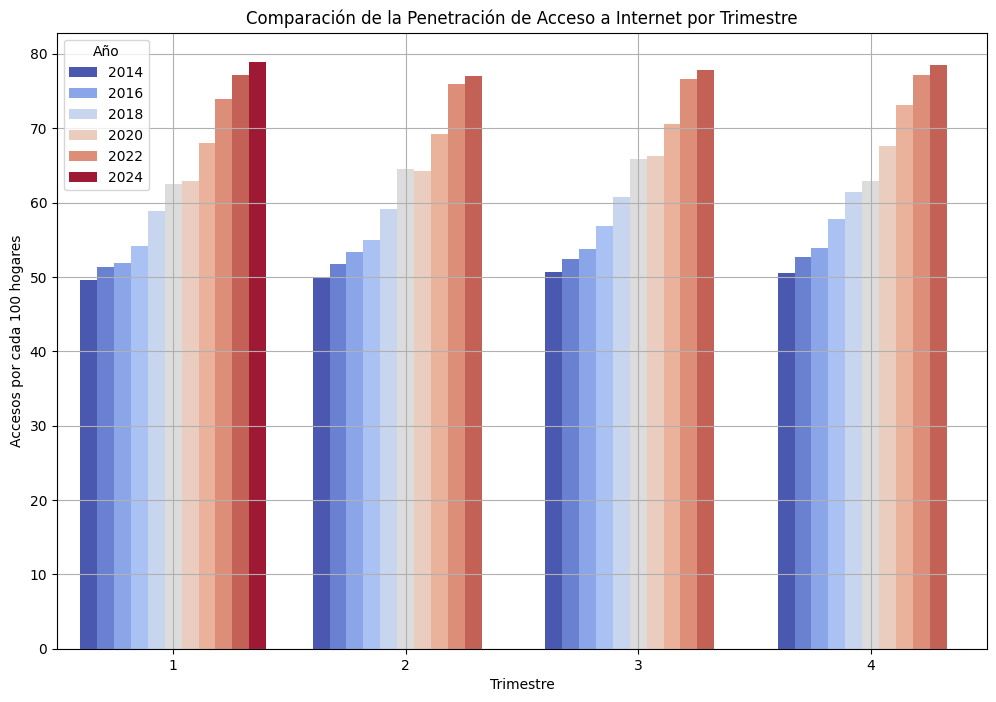

In [417]:
# Filtrar los datos por año y trimestre
plt.figure(figsize=(12, 8))
sns.barplot(x='Trimestre', y='Accesos por cada 100 hogares', data=df_penetracion_totales, hue='Año', palette='coolwarm')

# Configuración de etiquetas y título
plt.title('Comparación de la Penetración de Acceso a Internet por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Año')
plt.grid(True)
plt.show()


3. Comparación entre acceso por hogares y habitantes en un mismo gráfico para ver la relación entre los accesos por hogares y habitantes:

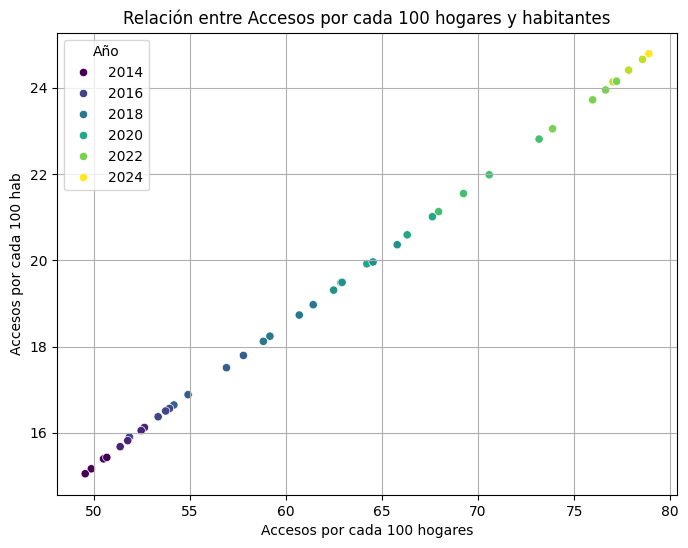

In [354]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Accesos por cada 100 hogares', y='Accesos por cada 100 hab', data=df_penetracion_totales, hue='Año', palette='viridis')

# Configuración de etiquetas y título
plt.title('Relación entre Accesos por cada 100 hogares y habitantes')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Accesos por cada 100 hab')
plt.grid(True)
plt.show()


#### Se puede ver en el grafico de lineas como evolucionan los accesos cada 100 habitantes como asi tambien los accesos cada 100 hogares, esto acompañado del grafico de dispersion se puede decir que hay una relacion lineal.
#### En el grafico de barras podemos ver la penetracion por trimestre en todos los años.

---

### Analisis de la hoja Accesos Por Tecnología

In [418]:
# Pasamos la hoja a un Data Frame
df_accesos_por_tecnologia = df_internet.parse('Accesos Por Tecnología')
df_accesos_por_tecnologia.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024.0,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024.0,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024.0,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024.0,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024.0,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [419]:
# Valores nulos
df_accesos_por_tecnologia.isna().sum()

Año             2
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [420]:
# Valores ceros
(df_accesos_por_tecnologia == 0).sum()

Año              0
Trimestre        0
Provincia        0
ADSL             0
Cablemodem      14
Fibra óptica     9
Wireless        38
Otros            0
Total            0
dtype: int64

In [421]:
# Valores duplicados
df_accesos_por_tecnologia.duplicated().sum()

np.int64(0)

In [422]:
df_accesos_por_tecnologia.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

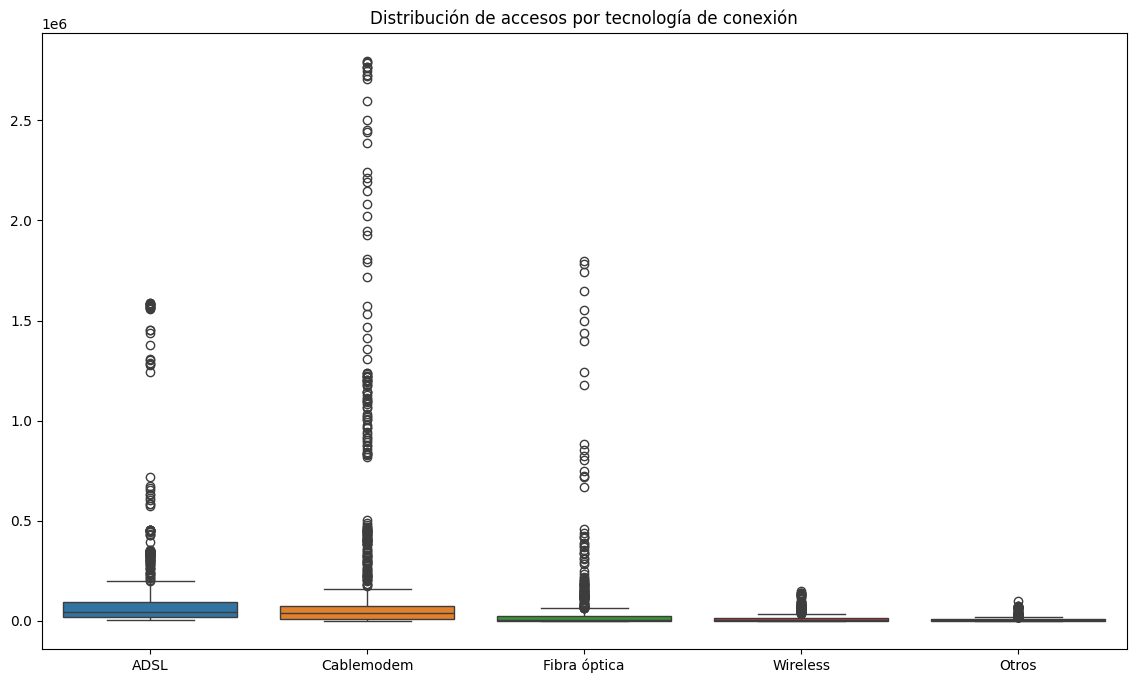

In [423]:
# Configuración de la figura
plt.figure(figsize=(14, 8))

# Crear un boxplot para cada tecnología
sns.boxplot(data=df_accesos_por_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']])

# Título del gráfico
plt.title('Distribución de accesos por tecnología de conexión')

# Mostrar el gráfico
plt.show()


### Analisis de la hoja Velocidad % por prov

In [424]:
df_velocidad_por_provincia = df_internet.parse('Velocidad % por prov')
df_velocidad_por_provincia.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.13
1,2024,1,Capital Federal,229.94
2,2024,1,Catamarca,91.45
3,2024,1,Chaco,107.51
4,2024,1,Chubut,20.50


In [425]:
# Valores nulos
df_velocidad_por_provincia.isna().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [426]:
# Valores ceros
(df_velocidad_por_provincia == 0).sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [427]:
# Valores duplicados
df_velocidad_por_provincia.duplicated().sum()

np.int64(0)

In [428]:
df_velocidad_por_provincia.columns

Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)'], dtype='object')

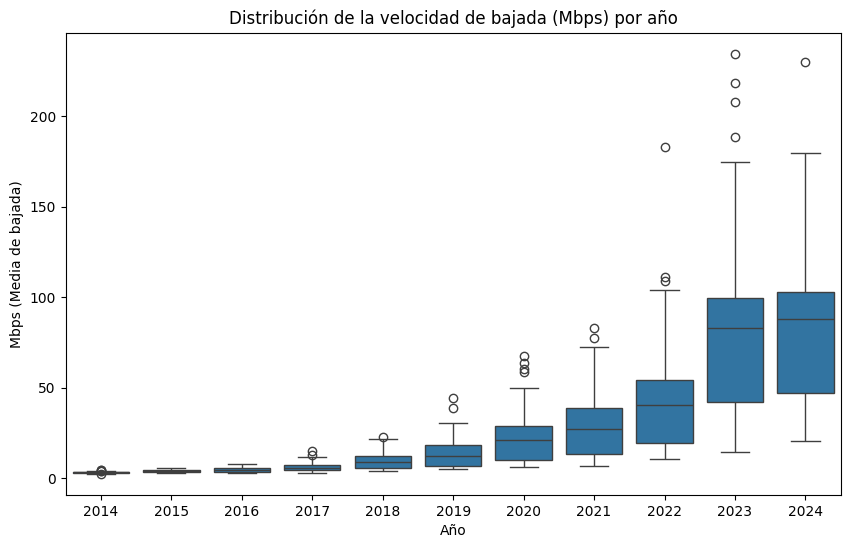

In [429]:
# Configuración de la figura
plt.figure(figsize=(10, 6))

# Crear boxplot de la velocidad de bajada (Mbps) por año
sns.boxplot(x='Año', y='Mbps (Media de bajada)', data=df_velocidad_por_provincia)

# Título del gráfico
plt.title('Distribución de la velocidad de bajada (Mbps) por año')

# Mostrar el gráfico
plt.show()


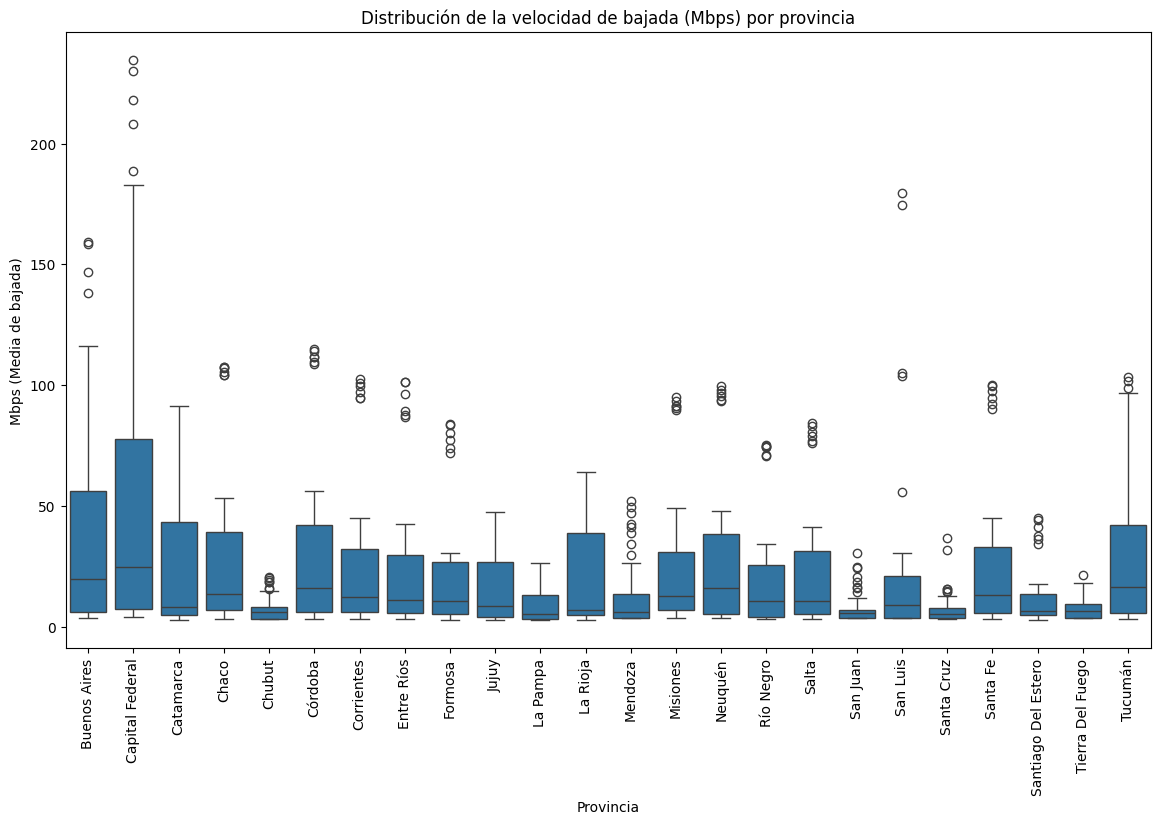

In [430]:
# Configuración de la figura
plt.figure(figsize=(14, 8))

# Crear boxplot de la velocidad de bajada (Mbps) por provincia
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=df_velocidad_por_provincia)

# Rotar etiquetas del eje X para mayor claridad
plt.xticks(rotation=90)

# Título del gráfico
plt.title('Distribución de la velocidad de bajada (Mbps) por provincia')

# Mostrar el gráfico
plt.show()


----

### Algunas graficas y conclusiones

Vamos a ver en el primer grafico como evolucionan los ingresos en pesos por los servicios de internet a traves de los años.
Se puede notar como aumentan considerablemente a partir del 2020, todo impulsado por la pandemia.
Si bien ya venian en crecimiento, a partir de esa fecha es notable la suba de la curva.

### Grafico de ingresos por años

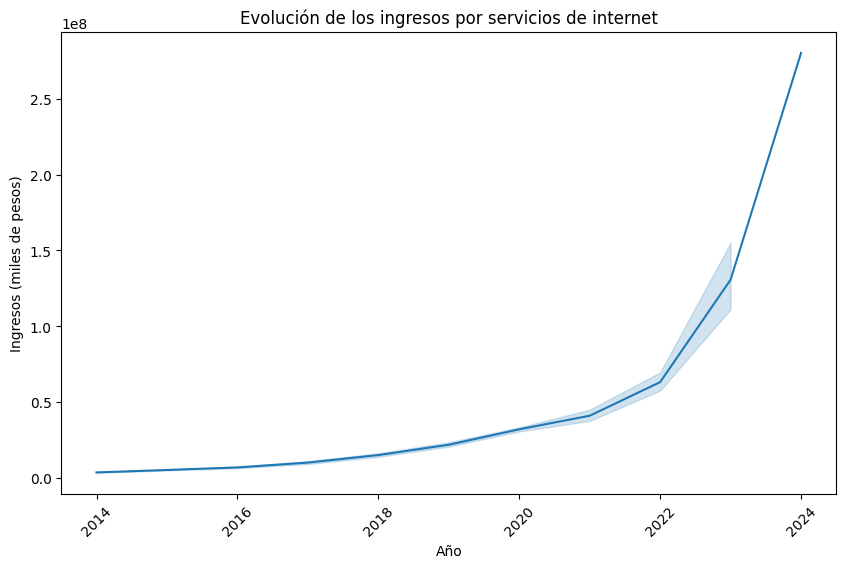

In [431]:
# Gráfico de la evolución de los ingresos
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Ingresos (miles de pesos)', data=df_ingresos)
plt.title('Evolución de los ingresos por servicios de internet')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

### Grafico de accesos por tecnologia

In [368]:
df_accesos_por_tecnologia.columns


Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

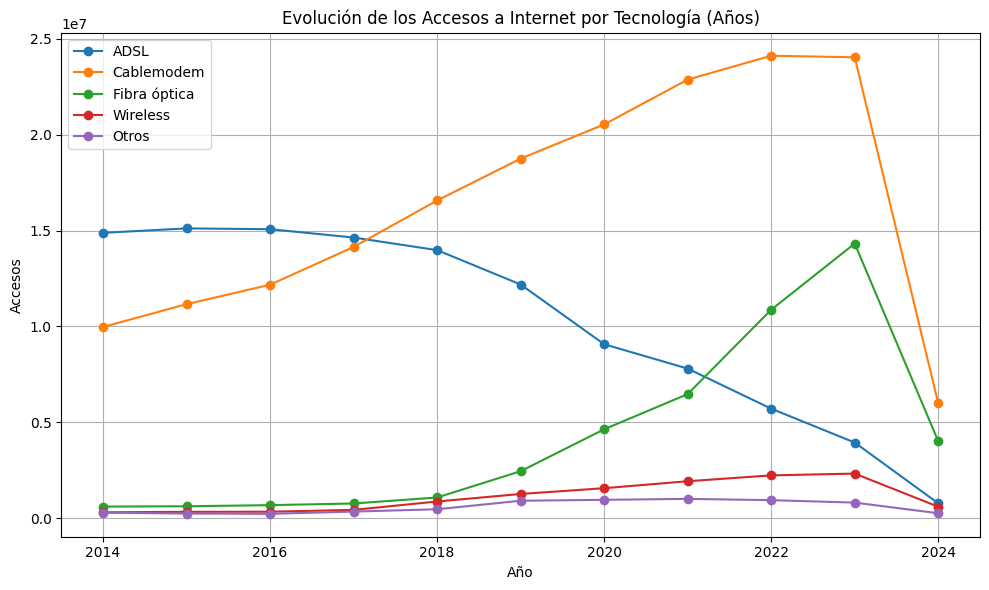

In [370]:
# Agrupar el dataframe por 'Año' y sumar los accesos para cada tecnología
df_agrupado = df_accesos_por_tecnologia.groupby('Año').sum()

# Graficar la evolución de las tecnologías
plt.figure(figsize=(10, 6))

plt.plot(df_agrupado.index, df_agrupado['ADSL'], label='ADSL', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Cablemodem'], label='Cablemodem', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Fibra óptica'], label='Fibra óptica', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Wireless'], label='Wireless', marker='o')
plt.plot(df_agrupado.index, df_agrupado['Otros'], label='Otros', marker='o')

# Configuración de la gráfica
plt.xlabel('Año')
plt.ylabel('Accesos')
plt.title('Evolución de los Accesos a Internet por Tecnología (Años)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Gráfico de líneas que muestra la evolución de los accesos a internet por diferentes tecnologías a lo largo de los años. Cada línea representa una tecnología de acceso a internet, como ADSL, Cablemodem, Fibra óptica, Wireless y otros tipos de acceso.

Aqui podemos ver algunas tendencias de crecimiento o decrecimiento de todas las tecnologias.

A simple vista y en concordancia con los avances tecnologicos y mejoras en las infraestructuras las tecnologias que crecen son Cable Modem y Fibra Optica.

In [432]:
df_accesos_por_velocidad.columns

Index(['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps',
       '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
       '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS',
       'Total'],
      dtype='object')

### Evolucion de las velocidades a traves de los años

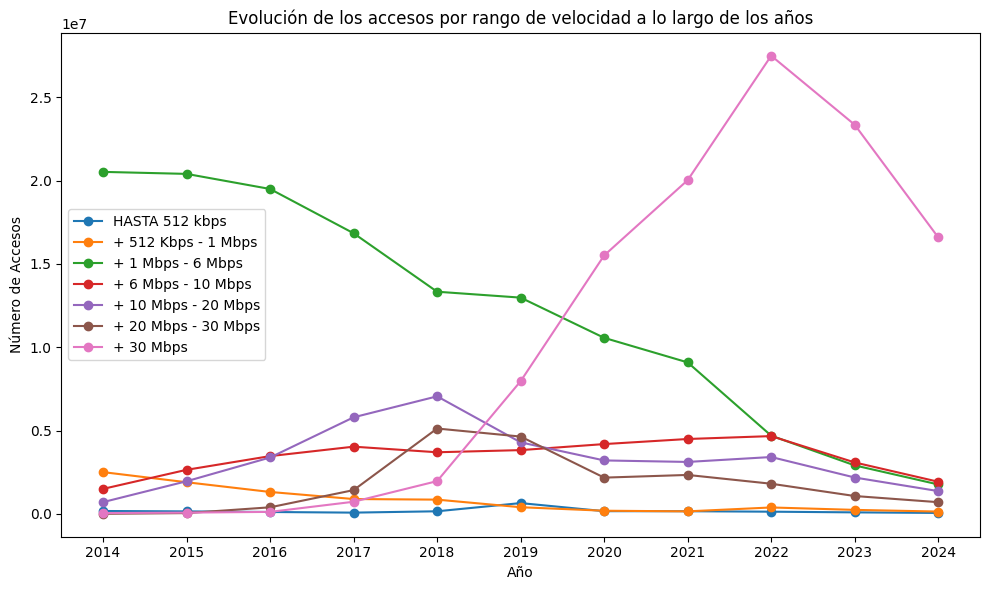

In [433]:
# Agrupar el dataframe por 'Año' y sumar los accesos para cada rango de velocidad
df_agrupado = df_accesos_por_velocidad.groupby('Año').sum()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar la evolución de los accesos para cada rango de velocidad
plt.plot(df_agrupado.index, df_agrupado['HASTA 512 kbps'], label='HASTA 512 kbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 512 Kbps - 1 Mbps'], label='+ 512 Kbps - 1 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 1 Mbps - 6 Mbps'], label='+ 1 Mbps - 6 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 6 Mbps - 10 Mbps'], label='+ 6 Mbps - 10 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 10 Mbps - 20 Mbps'], label='+ 10 Mbps - 20 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 20 Mbps - 30 Mbps'], label='+ 20 Mbps - 30 Mbps', marker='o')
plt.plot(df_agrupado.index, df_agrupado['+ 30 Mbps'], label='+ 30 Mbps', marker='o')

# Añadir título y etiquetas
plt.title('Evolución de los accesos por rango de velocidad a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de Accesos')
plt.xticks(df_agrupado.index)  # Asegurarse de que los años estén como ticks en el eje x

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.tight_layout()
plt.show()


Este gráfico de líneas muestra la evolución de los accesos a internet por diferentes rangos de velocidad a lo largo de los años. Cada línea representa un rango de velocidad distinto, desde conexiones muy lentas hasta las más rápidas (más de 30 Mbps). El gráfico ofrece una visión clara del comportamiento de los usuarios de internet respecto a la adopción de diferentes velocidades con el paso del tiempo.

Se observan tendencias de adoptar cada vez velocidades mas elevadas, entre 20 Mbps, y mas de 30 Mbps.

## KPI 1

1. KPI 1: Crecimiento de los accesos a velocidad +30 Mbps

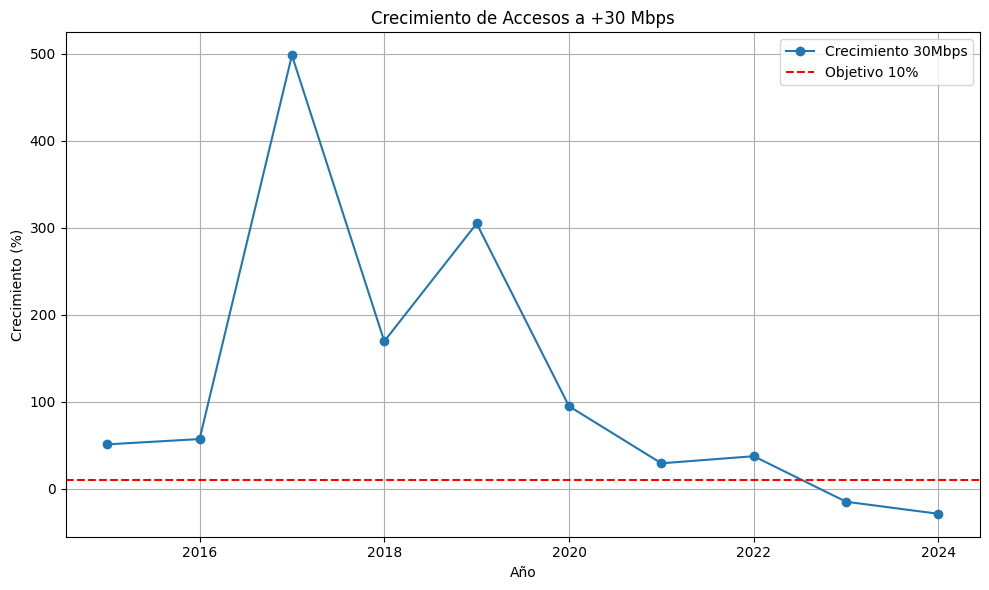

In [434]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar los datos por año
df_agrupado = df_accesos_por_velocidad.groupby('Año').sum()

# Calcular KPI Crecimiento 30 Mbps
df_agrupado['Crecimiento_30Mbps'] = (df_agrupado['+ 30 Mbps'] - df_agrupado['+ 30 Mbps'].shift(1)) / df_agrupado['+ 30 Mbps'].shift(1) * 100

# Visualización del KPI
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado.index, df_agrupado['Crecimiento_30Mbps'], marker='o', label='Crecimiento 30Mbps')
plt.axhline(y=10, color='r', linestyle='--', label='Objetivo 10%')
plt.title('Crecimiento de Accesos a +30 Mbps')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


2. KPI 2: Penetración de internet por hogar
Objetivo: Aumentar la penetración del acceso a internet en un 2% respecto al trimestre anterior.

In [452]:
df_accesos_por_tecnologia= df_accesos_por_tecnologia.isna().sum()


In [456]:
# Asegurarse de que 'Accesos_Fibra' es una serie de pandas
df_accesos_por_tecnologia['Accesos_Fibra'] = df_accesos_por_tecnologia['Fibra óptica']

# Ordenar los datos por 'Año' para aplicar shift de forma correcta
df_accesos_por_tecnologia = df_accesos_por_tecnologia.sort_values(by=['Año'])

# Calcular el KPI de crecimiento de accesos para Fibra Óptica
df_accesos_por_tecnologia['KPI_Crecimiento_Fibra'] = (
    (df_accesos_por_tecnologia['Accesos_Fibra'] - df_accesos_por_tecnologia['Accesos_Fibra'].shift(1)) /
    df_accesos_por_tecnologia['Accesos_Fibra'].shift(1)
) * 100

# Verificar que la columna de accesos no tiene ceros para evitar divisiones por cero
df_accesos_por_tecnologia['KPI_Crecimiento_Fibra'] = df_accesos_por_tecnologia['KPI_Crecimiento_Fibra'].replace([np.inf, -np.inf], np.nan)

# Visualización del KPI para Fibra Óptica
plt.figure(figsize=(10, 6))
plt.plot(df_accesos_por_tecnologia['Año'], df_accesos_por_tecnologia['KPI_Crecimiento_Fibra'], marker='o', label='Crecimiento Fibra Óptica')
plt.axhline(y=5, color='r', linestyle='--', label='Objetivo 5%')
plt.title('Crecimiento de Accesos de Fibra Óptica')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






TypeError: Series.sort_values() got an unexpected keyword argument 'by'

3. KPI 3: Incremento total de accesos a internet
Objetivo: Medir el incremento total de accesos a internet respecto al año anterior.

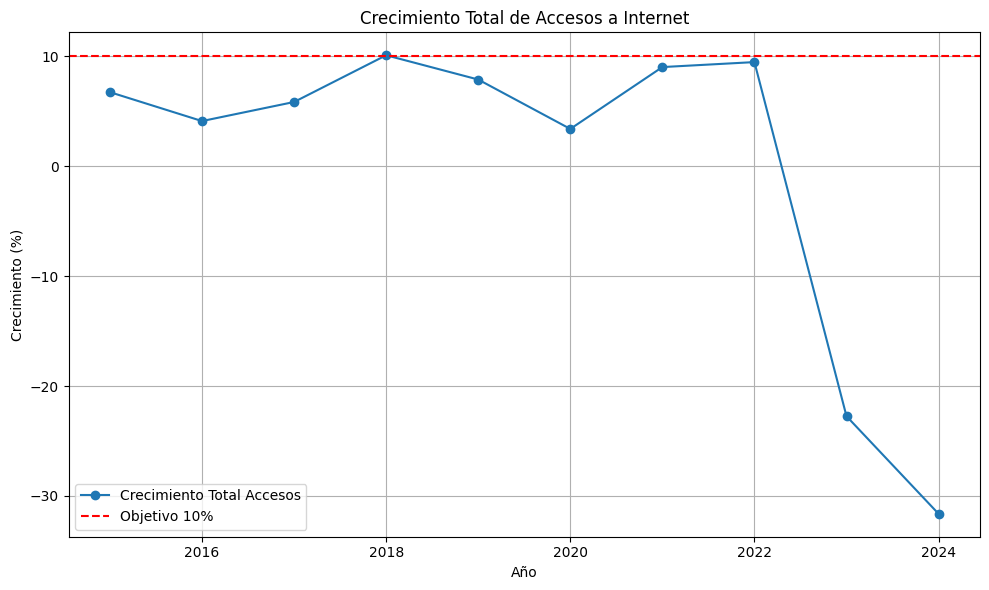

In [436]:
# Calcular KPI Incremento Total de Accesos
df_agrupado['Crecimiento_Total_Accesos'] = (df_agrupado['Total'] - df_agrupado['Total'].shift(1)) / df_agrupado['Total'].shift(1) * 100

# Visualización del KPI
plt.figure(figsize=(10, 6))
plt.plot(df_agrupado.index, df_agrupado['Crecimiento_Total_Accesos'], marker='o', label='Crecimiento Total Accesos')
plt.axhline(y=10, color='r', linestyle='--', label='Objetivo 10%')
plt.title('Crecimiento Total de Accesos a Internet')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [383]:
import pandas as pd

# Copia del DataFrame para trabajar
df_kpi = df_penetracion_totales.copy()

# Calcular "Acceso Actual"
df_kpi['Acceso Actual'] = df_kpi['Accesos por cada 100 hogares']

# Calcular "Nuevo Acceso" (se proyecta un aumento del 2%)
df_kpi['Nuevo Acceso'] = df_kpi['Acceso Actual'] * 1.02

# Calcular KPI (porcentaje de crecimiento esperado)
df_kpi['KPI_Crecimiento'] = ((df_kpi['Nuevo Acceso'] - df_kpi['Acceso Actual']) / df_kpi['Acceso Actual']) * 100

# Mostrar los primeros resultados para verificar
print(df_kpi[['Año', 'Trimestre', 'Acceso Actual', 'Nuevo Acceso', 'KPI_Crecimiento']].head())


    Año  Trimestre  Acceso Actual  Nuevo Acceso  KPI_Crecimiento
0  2024          1          78.89       80.4678              2.0
1  2023          4          78.56       80.1312              2.0
2  2023          3          77.84       79.3968              2.0
3  2023          2          77.02       78.5604              2.0
4  2023          1          77.20       78.7440              2.0


/tmp/ipykernel_486566/1608929291.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Año', y='KPI_Crecimiento', data=df_ultimo_trimestre, palette='coolwarm')


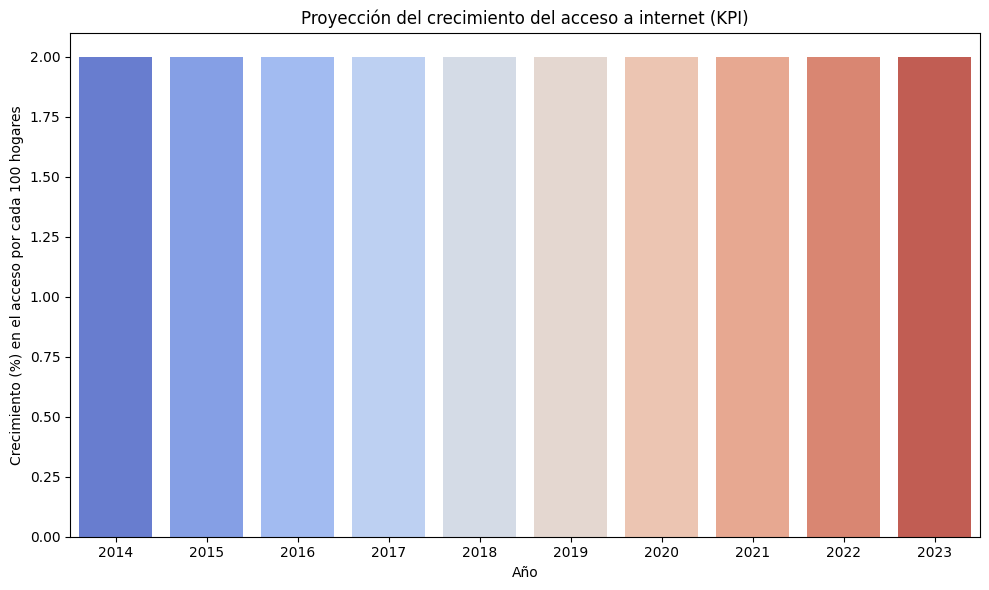

In [384]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo el último trimestre de cada año para graficar el KPI
df_ultimo_trimestre = df_kpi[df_kpi['Trimestre'] == df_kpi['Trimestre'].max()]

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el KPI (Crecimiento porcentual proyectado)
sns.barplot(x='Año', y='KPI_Crecimiento', data=df_ultimo_trimestre, palette='coolwarm')

# Añadir etiquetas y título
plt.title('Proyección del crecimiento del acceso a internet (KPI)')
plt.xlabel('Año')
plt.ylabel('Crecimiento (%) en el acceso por cada 100 hogares')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Interpretación del Gráfico:
El gráfico muestra la evolución de los accesos a internet por distintas tecnologías (ADSL, Cablemodem, Fibra Óptica, Wireless y Otros) a lo largo de los años.

ADSL: Vemos que esta tecnología, que fue predominante durante los primeros años del gráfico, ha ido disminuyendo de forma progresiva. Esto es coherente con la transición tecnológica que ha ocurrido hacia soluciones más rápidas y eficientes como la fibra óptica.

Cablemodem: A lo largo del tiempo, el número de accesos a internet mediante Cablemodem se ha mantenido relativamente estable. Aunque esta tecnología ha tenido una ligera disminución en los últimos años, sigue siendo una opción significativa para muchos usuarios.

Fibra Óptica: Esta es la tecnología que muestra el mayor crecimiento. A lo largo de los años, podemos observar un incremento sostenido en el número de accesos, lo que sugiere una migración hacia soluciones de mayor velocidad y estabilidad en las conexiones.

Wireless: Los accesos mediante tecnologías inalámbricas han mostrado un comportamiento irregular, con subidas y bajadas a lo largo del tiempo, pero en general, parece que han logrado mantener una presencia significativa en el mercado, aunque no con el mismo crecimiento que la fibra óptica.

Otros: Esta categoría agrupa accesos a internet mediante tecnologías menos comunes. Aunque no muestran un crecimiento notable, siguen representando una porción del mercado.

Conclusiones:
Migración a Fibra Óptica: El gráfico refleja una clara tendencia de migración hacia fibra óptica, que se ha convertido en la tecnología dominante en los últimos años. Esta tecnología ofrece velocidades superiores y mejor estabilidad, lo que la ha hecho preferida tanto para los hogares como para las empresas.

Disminución del ADSL: La caída de los accesos a internet mediante ADSL es evidente, lo que indica que esta tecnología se está quedando obsoleta y siendo reemplazada por alternativas más modernas.

Cablemodem como opción estable: A pesar del auge de la fibra óptica, el Cablemodem ha logrado mantenerse como una opción viable para muchos usuarios. Sin embargo, su crecimiento ha sido mucho más moderado en comparación con la fibra.

Wireless y su papel: Las tecnologías inalámbricas han tenido fluctuaciones a lo largo de los años, lo que podría sugerir que están más influenciadas por factores geográficos o situaciones puntuales (como en áreas rurales o donde no llegan otras tecnologías).

Diversificación en "Otros": Aunque los accesos clasificados en "Otros" no son predominantes, siguen presentes. Esto podría estar relacionado con el uso de tecnologías específicas en determinadas regiones o situaciones particulares donde otras opciones no son viables.

En resumen, el gráfico refleja la evolución natural del mercado de internet en favor de tecnologías más avanzadas, con un claro crecimiento de la fibra óptica y una caída progresiva de tecnologías más antiguas como el ADSL.

### Grafico penetracion por poblacion

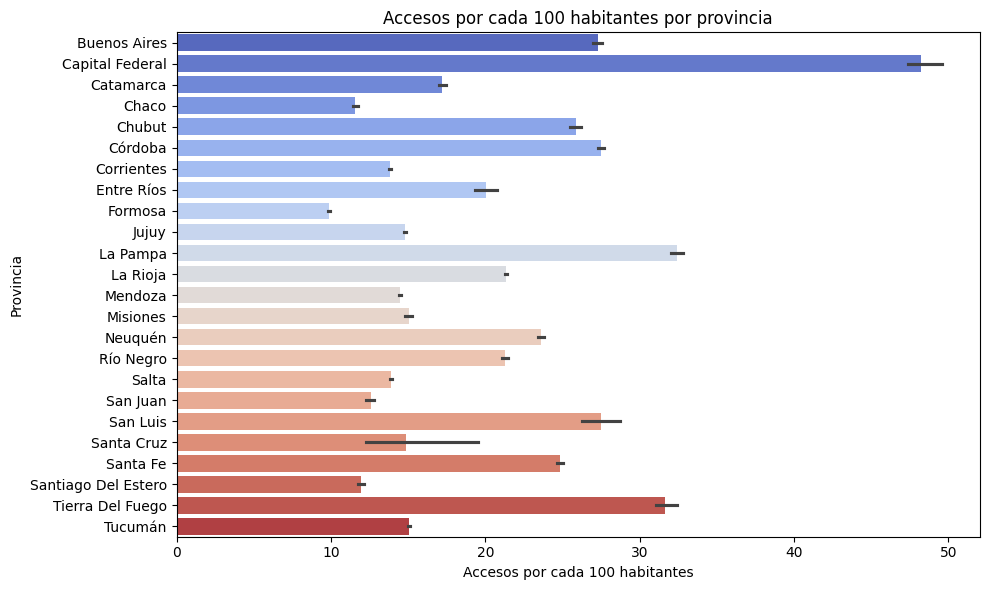

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar con hue (opción recomendada)
plt.figure(figsize=(10, 6))
sns.barplot(x='Accesos por cada 100 hab', y='Provincia', data=df_filtrado, hue='Provincia', palette='coolwarm', legend=False)

# Títulos y etiquetas
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



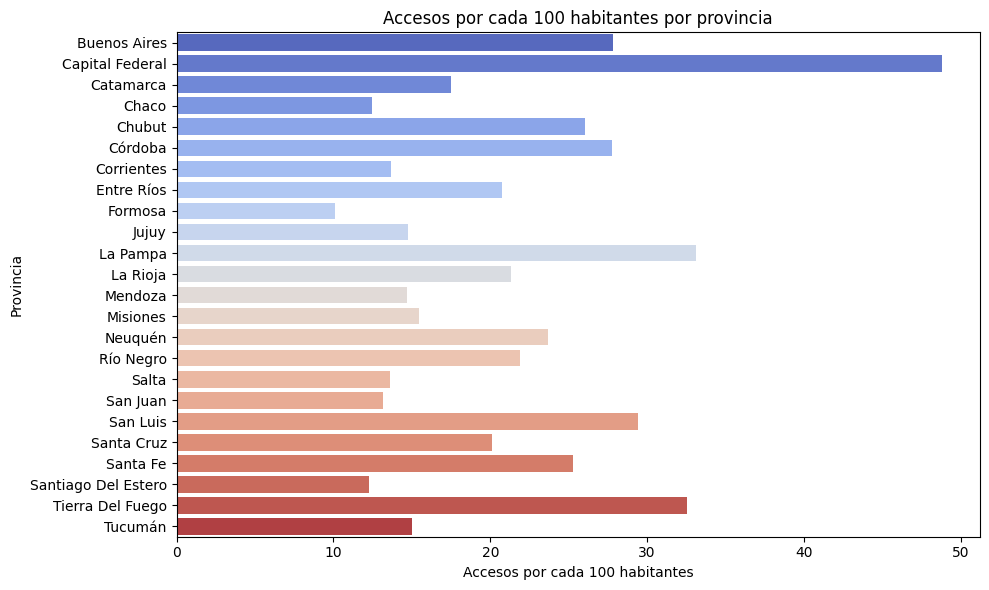

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar usando 'hue' para que cada provincia tenga un color distinto
plt.figure(figsize=(10, 6))
sns.barplot(x='Accesos por cada 100 hab', y='Provincia', data=df_filtrado, hue='Provincia', palette='coolwarm', dodge=False)

# Títulos y etiquetas
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


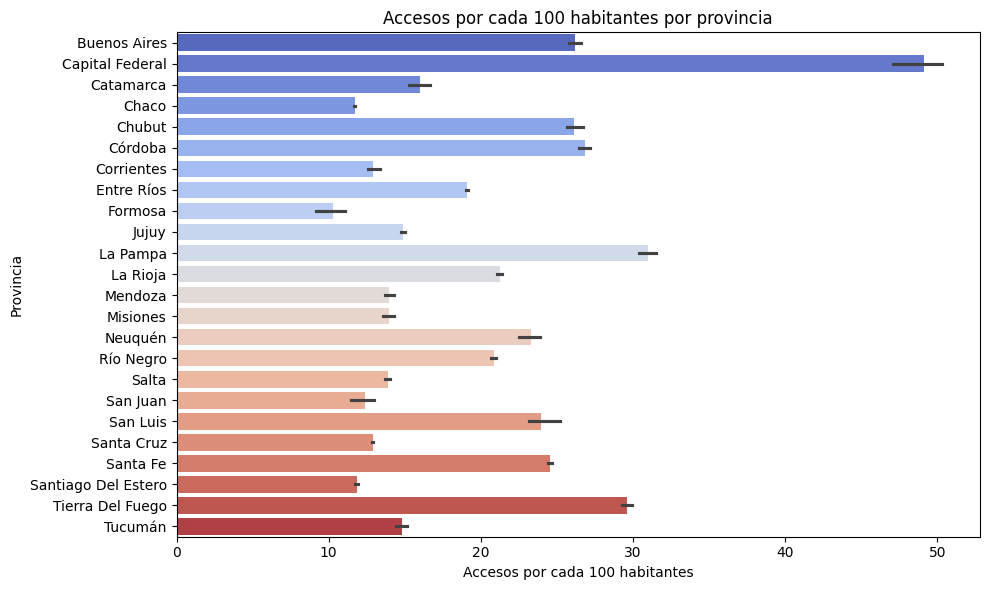

In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

# Usar hue para asignar colores por provincia
plt.figure(figsize=(10, 6))
sns.barplot(x='Accesos por cada 100 hab', y='Provincia', data=df_filtrado, hue='Provincia', palette='coolwarm', dodge=False)

# Títulos y etiquetas
plt.title('Accesos por cada 100 habitantes por provincia')
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Provincia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Este gráfico es un gráfico de barras que muestra la penetración de internet por provincia en el año 2022, donde la penetración se mide en términos de accesos por cada 100 hogares. Cada barra representa una provincia, y la longitud de la barra refleja el nivel de penetración de internet en esa provincia. Las provincias están ordenadas en el eje y, y el número de accesos está en el eje x.

Análisis de la información:
Comparación de Provincias: Puedes comparar visualmente qué provincias tienen una mayor o menor penetración de internet. Las provincias con barras más largas indican una penetración más alta, es decir, más hogares con acceso a internet por cada 100.

Disparidades regionales: Si observas grandes diferencias en la longitud de las barras entre provincias, esto podría indicar disparidades significativas en el acceso a internet entre diferentes regiones del país. Algunas provincias pueden tener acceso a internet más extendido que otras.

Provincias con menor penetración: Las provincias con las barras más cortas están experimentando una menor penetración de internet, lo que podría reflejar problemas de infraestructura, falta de inversión o barreras geográficas.

Provincias con mayor penetración: Las provincias con las barras más largas indican un alto nivel de acceso a internet por hogar. Esto podría reflejar que en esas áreas el acceso a internet está más desarrollado, con una mayor disponibilidad de servicios de telecomunicaciones.

Análisis y Conclusiones:
Provincias líderes y rezagadas: Dependiendo de los datos, se pueden identificar las provincias que tienen una buena infraestructura de internet, con una penetración alta (barras más largas), y aquellas que están rezagadas (barras más cortas).

Política y desarrollo: Si existen disparidades notables, los resultados podrían indicar la necesidad de intervenciones políticas o económicas para mejorar el acceso a internet en las provincias con menor penetración.

Tendencias para el futuro: Si este análisis se compara con datos de años anteriores, podrías determinar si las provincias con menor penetración están mejorando con el tiempo, si las diferencias se están ampliando o si están estancadas.

Recomendaciones para acciones:
Mejora de infraestructuras: Las provincias con baja penetración podrían beneficiarse de mayores inversiones en infraestructura de telecomunicaciones, especialmente en áreas rurales.

Políticas de inclusión digital: Es posible que se necesiten políticas de inclusión digital para reducir las desigualdades en el acceso a internet entre provincias.

En resumen, este gráfico te permite visualizar las desigualdades geográficas en el acceso a internet y determinar en qué áreas podría ser necesario intervenir para aumentar la conectividad.

## Probando KPI

Para implementar el KPI propuesto, es necesario calcular el porcentaje de aumento de acceso a internet por cada 100 hogares en el próximo trimestre, a partir del acceso actual en cada provincia. A continuación te explico cómo hacerlo y cómo graficar este KPI. También te proporcionaré un ejemplo de dos KPIs adicionales relevantes para este análisis.

KPI Propuesto: Aumento del 2% en el acceso a internet por cada 100 hogares para el próximo trimestre
1. Cálculo del KPI
El KPI se calcula utilizando la siguiente fórmula:

𝐾
𝑃
𝐼
=
(
𝑁
𝑢
𝑒
𝑣
𝑜
 
𝐴
𝑐
𝑐
𝑒
𝑠
𝑜
−
𝐴
𝑐
𝑐
𝑒
𝑠
𝑜
 
𝐴
𝑐
𝑡
𝑢
𝑎
𝑙
𝐴
𝑐
𝑐
𝑒
𝑠
𝑜
 
𝐴
𝑐
𝑡
𝑢
𝑎
𝑙
)
∗
100
KPI=( 
Acceso Actual
Nuevo Acceso−Acceso Actual
​
 )∗100
Donde:

"Nuevo acceso" es el número de hogares proyectado para el siguiente trimestre (un aumento del 2% sobre el acceso actual).
"Acceso actual" es el número de hogares con acceso en el trimestre actual.


In [225]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que df_penetracion_hogares contiene los accesos por cada 100 hogares
# Crear una nueva columna con el acceso proyectado para el próximo trimestre (aumento del 2%)
df_penetracion_poblacion['Nuevo Acceso'] = df_penetracion_poblacion['Accesos por cada 100 hab'] * 1.02

# Calcular el KPI (aumento en el acceso por cada 100 hogares)
df_penetracion_poblacion['KPI'] = ((df_penetracion_poblacion['Nuevo Acceso'] - df_penetracion_poblacion['Accesos por cada 100 hab']) 
                                   / df_penetracion_poblacion['Accesos por cada 100 hab']) * 100

# Mostrar los primeros resultados
df_penetracion_poblacion[['Provincia', 'Año', 'Trimestre', 'Accesos por cada 100 hab', 'Nuevo Acceso', 'KPI']].head()


,Provincia,Año,Trimestre,Accesos por cada 100 hab,Nuevo Acceso,KPI
0,Buenos Aires,2024,1,27.80,28.3560,2.0
1,Capital Federal,2024,1,48.78,49.7556,2.0
2,Catamarca,2024,1,17.50,17.8500,2.0
3,Chaco,2024,1,12.48,12.7296,2.0
4,Chubut,2024,1,26.02,26.5404,2.0


2. Graficar el KPI por provincia
Un gráfico de barras puede ser útil para visualizar el KPI por provincia.

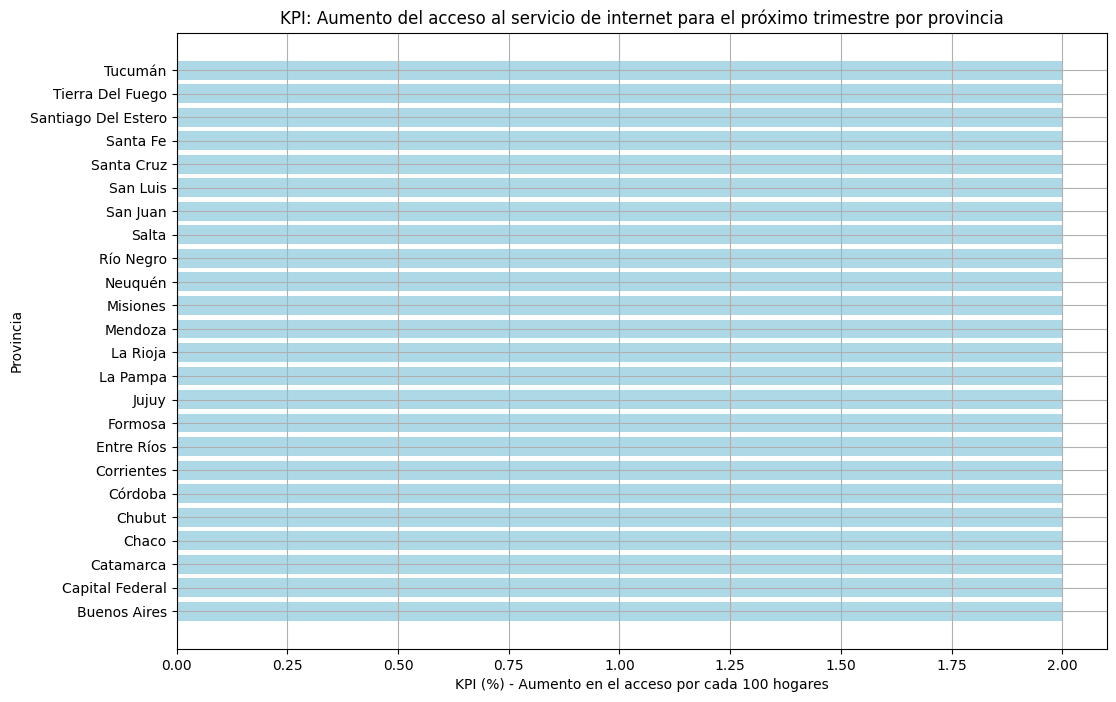

In [226]:
plt.figure(figsize=(12, 8))
# Graficar el KPI por provincia
df_filtrado = df_penetracion_poblacion[df_penetracion_poblacion['Año'] == 2023]
plt.barh(df_filtrado['Provincia'], df_filtrado['KPI'], color='lightblue')

# Etiquetas del gráfico
plt.title('KPI: Aumento del acceso al servicio de internet para el próximo trimestre por provincia')
plt.xlabel('KPI (%) - Aumento en el acceso por cada 100 hogares')
plt.ylabel('Provincia')
plt.grid(True)
plt.show()


KPI Adicional 1: Variación trimestral de los accesos
Este KPI mide la variación del acceso a internet en cada trimestre respecto al trimestre anterior.

𝐾
𝑃
𝐼
𝑡
𝑟
𝑖
𝑚
𝑒
𝑠
𝑡
𝑟
𝑎
𝑙
=
(
𝐴
𝑐
𝑐
𝑒
𝑠
𝑜
𝑡
𝑟
𝑖
𝑚
𝑒
𝑠
𝑡
𝑟
𝑒
 
𝑎
𝑐
𝑡
𝑢
𝑎
𝑙
−
𝐴
𝑐
𝑐
𝑒
𝑠
𝑜
𝑡
𝑟
𝑖
𝑚
𝑒
𝑠
𝑡
𝑟
𝑒
 
𝑎
𝑛
𝑡
𝑒
𝑟
𝑖
𝑜
𝑟
𝐴
𝑐
𝑐
𝑒
𝑠
𝑜
𝑡
𝑟
𝑖
𝑚
𝑒
𝑠
𝑡
𝑟
𝑒
 
𝑎
𝑛
𝑡
𝑒
𝑟
𝑖
𝑜
𝑟
)
∗
100
KPI 
trimestral
​
 =( 
Acceso 
trimestre anterior
​
 
Acceso 
trimestre actual
​
 −Acceso 
trimestre anterior
​
 
​
 )∗100
Código para el KPI trimestral:

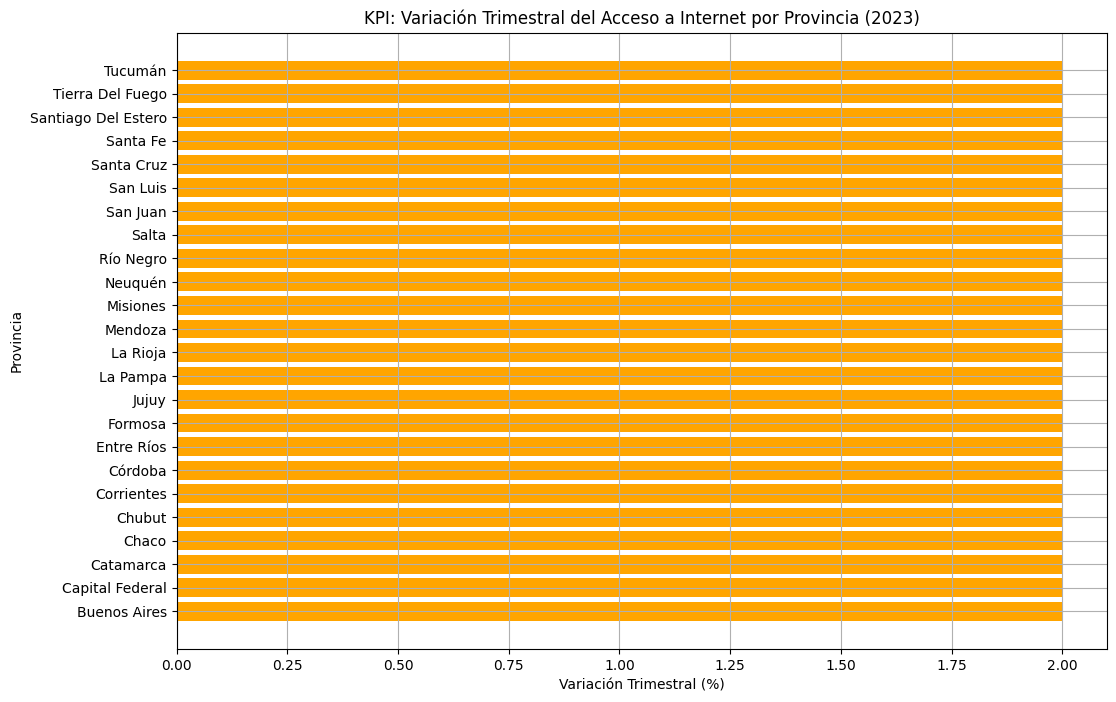

In [230]:
# Ordenar por Año y Trimestre
df_penetracion_poblacion = df_penetracion_poblacion.sort_values(by=['Provincia', 'Año', 'Trimestre'])

# Calcular el KPI de variación trimestral
df_penetracion_poblacion['KPI'] = df_penetracion_poblacion.groupby('Provincia')['Accesos por cada 100 hab'].pct_change() * 100

# Graficar la variación trimestral por provincia
plt.figure(figsize=(12, 8))
plt.barh(df_filtrado['Provincia'], df_filtrado['KPI'], color='orange')

plt.title('KPI: Variación Trimestral del Acceso a Internet por Provincia (2023)')
plt.xlabel('Variación Trimestral (%)')
plt.ylabel('Provincia')
plt.grid(True)
plt.show()


KPI Adicional 2: Tasa de penetración en los hogares
Este KPI mide la tasa de penetración en los hogares en un trimestre específico, es decir, cuántos hogares por cada 100 tienen acceso a internet en cada provincia.

𝐾
𝑃
𝐼
𝑝
𝑒
𝑛
𝑒
𝑡
𝑟
𝑎
𝑐
𝑖
𝑜
ˊ
𝑛
=
(
𝐴
𝑐
𝑐
𝑒
𝑠
𝑜
𝑠
 
𝑝
𝑜
𝑟
 
𝑐
𝑎
𝑑
𝑎
 
100
 
ℎ
𝑜
𝑔
𝑎
𝑟
𝑒
𝑠
100
)
∗
100
KPI 
penetraci 
o
ˊ
 n
​
 =( 
100
Accesos por cada 100 hogares
​
 )∗100
Código para el KPI de penetración:

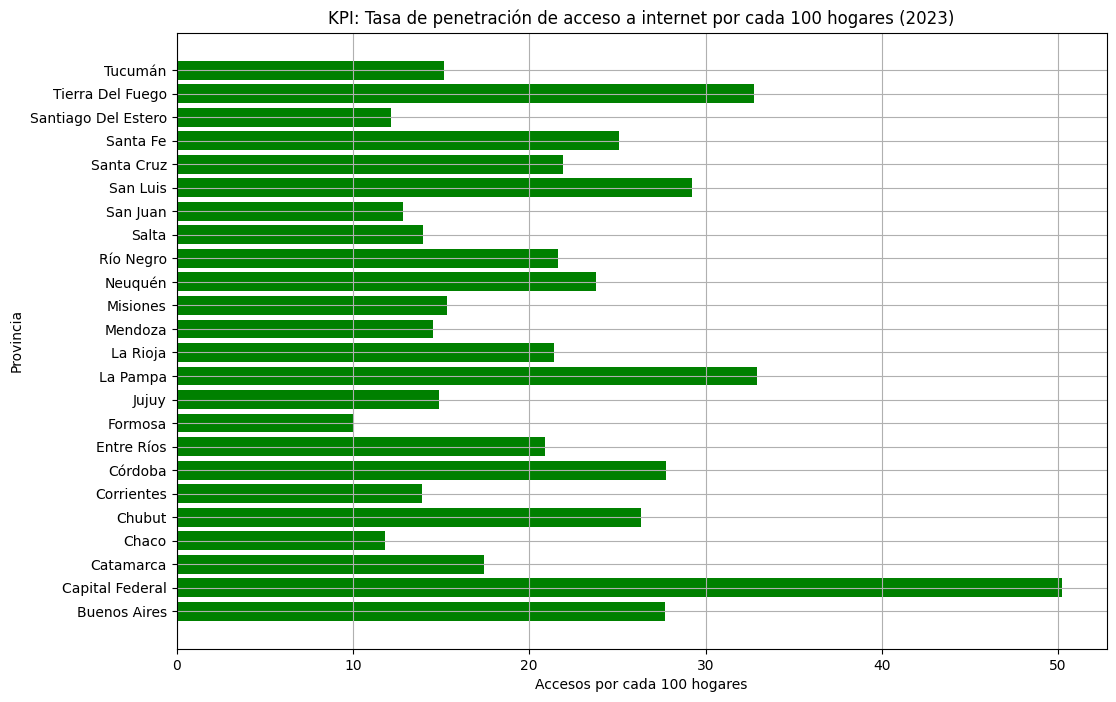

In [231]:
# KPI de tasa de penetración en los hogares (es el mismo valor que ya está calculado)
plt.figure(figsize=(12, 8))

# Filtramos por un año específico
df_filtrado = df_penetracion_poblacion[df_penetracion_poblacion['Año'] == 2023]

# Graficar la tasa de penetración por provincia
plt.barh(df_filtrado['Provincia'], df_filtrado['Accesos por cada 100 hab'], color='green')

plt.title('KPI: Tasa de penetración de acceso a internet por cada 100 hogares (2023)')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Provincia')
plt.grid(True)
plt.show()


Conclusiones:
KPI propuesto: Te permite monitorear el aumento esperado del 2% en los accesos a internet por provincia para el próximo trimestre.
KPI trimestral: Ofrece una visión clara de las variaciones de accesos entre trimestres.
KPI de penetración: Indica cuántos hogares tienen acceso a internet, facilitando el análisis de la penetración del servicio en cada provincia.
Estos KPIs pueden proporcionar una visión completa de cómo ha evolucionado el acceso a internet en Argentina a nivel provincial y cómo se proyecta a futuro.

# Mirar esto despues

In [378]:
import pandas as pd

# Suponiendo que tienes un DataFrame con las columnas ['Año', 'Provincia', 'Fibra óptica', 'Cablemodem']
# Filtrar los datos de los años de la pandemia (2020-2022)
df_pandemia = df_accesos_por_tecnologia[df_accesos_por_tecnologia['Año'].isin([2020, 2021, 2022])]

# Agrupar por año para obtener los totales por cada tecnología
df_totales_pandemia = df_pandemia.groupby('Año')[['Fibra óptica', 'Cablemodem']].sum()

# Calcular el porcentaje de crecimiento año a año para Fibra óptica y Cablemodem
df_totales_pandemia['Fibra_Optica_Crecimiento'] = df_totales_pandemia['Fibra óptica'].pct_change() * 100
df_totales_pandemia['Cablemodem_Crecimiento'] = df_totales_pandemia['Cablemodem'].pct_change() * 100

# Mostrar las estadísticas
print(df_totales_pandemia)


        Fibra óptica  Cablemodem  Fibra_Optica_Crecimiento  \
Año                                                          
2020.0     4636620.0  20539964.0                       NaN   
2021.0     6473506.0  22877010.0                 39.616919   
2022.0    10874934.0  24122067.0                 67.991410   

        Cablemodem_Crecimiento  
Año                             
2020.0                     NaN  
2021.0               11.378043  
2022.0                5.442394  


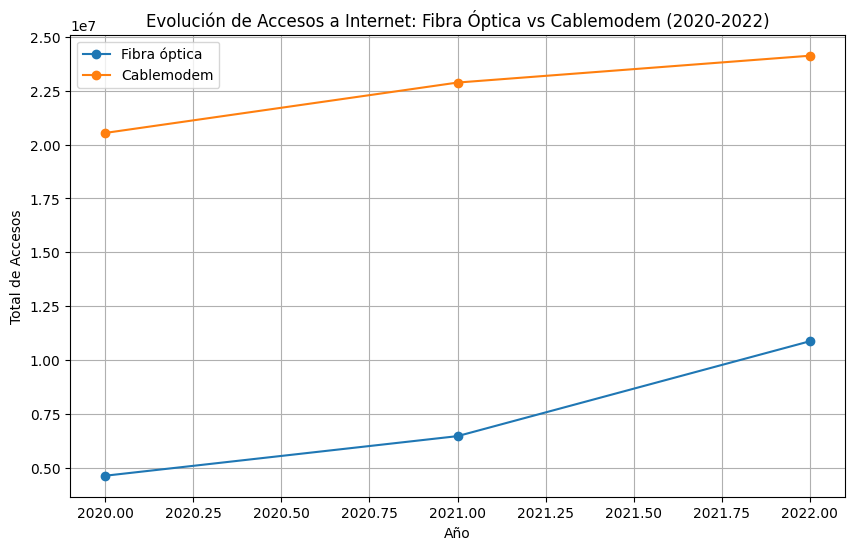

In [379]:
import matplotlib.pyplot as plt

# Gráfico de evolución
df_totales_pandemia[['Fibra óptica', 'Cablemodem']].plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Evolución de Accesos a Internet: Fibra Óptica vs Cablemodem (2020-2022)')
plt.ylabel('Total de Accesos')
plt.xlabel('Año')
plt.grid(True)
plt.show()


Posibles conclusiones:
1. Fibra Óptica: Dependiendo del crecimiento que veas, podrías observar si la adopción de fibra óptica ha crecido significativamente durante la pandemia, posiblemente debido a la necesidad de mejores conexiones en el hogar.
2. Cablemodem: También podrías observar si el crecimiento de Cablemodem ha sido sostenido o ha disminuido frente a Fibra Óptica.
Con estos análisis, podrás ver cómo ha evolucionado el acceso a internet durante los últimos años y si hay una transición clara hacia tecnologías más rápidas como la fibra óptica.